In [1]:
import numpy as np
import pandas as pd
from pandas.io import sql
import sqlalchemy as sa
import yaml as yml
import json
import demjson
get_ipython().magic(u'matplotlib inline')
import scipy.stats as ssp
from matplotlib import pyplot as plt
from __future__ import division

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("./BFAS_SII_RAW_ANSWERS.csv")
df = df.convert_objects(convert_numeric=True)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [5]:
df = df.drop("Unnamed: 0",axis=1)

In [6]:
df.head()

,uniqueid,assignmentid,workerid,hitid,ipaddress,browser,platform,language,cond,counterbalance,codeversion,beginhit,beginexp,endhit,bonus,status,datastring
0,A115PR5C0O03UJ:36WLNQG78ZBWUDGA6QM3Y1E6MN3EBA,36WLNQG78ZBWUDGA6QM3Y1E6MN3EBA,A115PR5C0O03UJ,3W9XHF7WGKWXQF47CWJP762E1STTKF,127.13.130.129,safari,macos,UNKNOWN,0,0,2,2014-11-04 19:01:43,2014-11-04 19:03:27,2014-11-04 19:12:11,0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
1,A119Y1O8BULMQI:3PWWM24LHSZLXZ6NAU7S5YFGHER822,3PWWM24LHSZLXZ6NAU7S5YFGHER822,A119Y1O8BULMQI,3W9XHF7WGKWXQF47CWJP762E1STTKF,127.13.130.129,chrome,windows,UNKNOWN,0,0,2,2014-11-04 18:39:26,2014-11-04 18:39:48,2014-11-04 18:51:36,0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
2,A11RAQ3AXKIX6J:33PPUNGG386HLFOVYAM6JQKSSFERZ5,33PPUNGG386HLFOVYAM6JQKSSFERZ5,A11RAQ3AXKIX6J,3W9XHF7WGKWXQF47CWJP762E1STTKF,127.13.130.129,chrome,windows,UNKNOWN,0,0,2,2014-11-04 18:53:28,2014-11-04 18:53:47,2014-11-04 19:09:17,0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
3,A127IRK7LVV5NU:3300DTYQT2IJYJIZP8JTTQ958N3EQL,3300DTYQT2IJYJIZP8JTTQ958N3EQL,A127IRK7LVV5NU,3W9XHF7WGKWXQF47CWJP762E1STTKF,127.13.130.129,firefox,windows,UNKNOWN,0,0,2,2014-11-04 18:47:34,2014-11-04 18:47:50,2014-11-04 18:56:15,0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
4,A128W22BIT8D9O:3DHE4R9OCWC0QEC5TSJGXBWE5X5G2R,3DHE4R9OCWC0QEC5TSJGXBWE5X5G2R,A128W22BIT8D9O,3W9XHF7WGKWXQF47CWJP762E1STTKF,127.13.130.129,chrome,macos,UNKNOWN,0,0,2,2014-11-04 18:52:55,2014-11-04 18:53:20,2014-11-04 19:00:46,0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."


In [7]:
len(df)

419

In [8]:
def takestring(row):
    #print json.loads(row['datastring'])
    try:
        d = json.loads(row['datastring'])
    except:
        print row
    else:
   # print jj
        j= d['data']
        for a in j:
            b = a['trialdata']
            if 'answer' in b:
                item_id = b['id']
                rawanswer = b['answer']
                row[item_id] = rawanswer
    #print row
        return pd.Series(row)


In [9]:
df=df[df['status']==4]


In [10]:
len(df)

419

In [11]:
df = df.apply(takestring,axis=1)
df = df.convert_objects(convert_numeric=True)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [12]:
len(df)

419

In [13]:
df = df[df['BFAS-1+'].notnull()]


In [14]:
len(df)

419

In [15]:
print df.columns.tolist()[:-17][-26:]
print len(df.columns.tolist()[:-17][-26:])

[u'IE_19+', u'IE_20+', u'IE_21+', u'IE_22-', u'IE_23-', u'IE_24+', u'IE_25-', u'IE_26-', u'OPG_10+', u'OPG_11-', u'OPG_12+', u'OPG_13+', u'OPG_14+', u'OPG_15+', u'OPG_16+', u'OPG_17-', u'OPG_18-', u'OPG_9+', u'PBR_1+', u'PBR_2-', u'PBR_3+', u'PBR_4+', u'PBR_5+', u'PBR_6-', u'PBR_7-', u'PBR_8-']
26


In [16]:
def split_and_reverse(df):
    ls_col = df.columns.values.tolist()
    ls_col.sort()
   # print ls_col
    r_ls_col = ls_col[:-17] #the restricted list of columns #MAKE SURE THIS PARAM IS RIGHT
    bfas_cols = ['workerid']
    opg_cols = ['workerid']
    bfas_cols.extend(r_ls_col[:-26])
    opg_cols.extend(r_ls_col[-26:])
    Neuroticism = ['BFAS-1+','BFAS-2+','BFAS-3+',
                   'BFAS-4+','BFAS-5+','BFAS-6+',
                   'BFAS-F7-','BFAS-8-','BFAS-9-',
                   'BFAS-10-','BFAS-11+','BFAS-12+',
                   'BFAS-13+','BFAS-14+','BFAS-15+',
                   'BFAS-16+','BFAS-17-','BFAS-18-',
                   'BFAS-19-','BFAS-20-']
    print bfas_cols[0:10]
    print '\n'
    print opg_cols
    print '\n'
    BfasDf = df[bfas_cols]
    OpgDf = df[opg_cols]

   # df['ref'] = pd.Series([100.0 for x in range(len(BffDf['workerId']))])
   # print df['ref'].tail()



    for label in bfas_cols:
        #print label
        if label[-1]=='-': #if item is reversed:
             #print BffDf[label].head()
             #print '\n'
             #print len(BffDf[label])
             #a = ref.sub(BffDf[label])
             #print a.head()
            BfasDf[label] = 100- BfasDf[label].astype(float)



        elif label[-1]=='+': #label = workerID
            pass
        else:
            BfasDf.loc[label] = df['workerid']

    print OpgDf['OPG_16+'].loc[1]
    print type(OpgDf['OPG_16+'].loc[1])

    OpgDf['OPG_16+'] = 100-2*abs(OpgDf['OPG_16+']-50)
    OpgDf['IE_21+'] = 100-2*abs(OpgDf['IE_21+']-50)


    OpgDf['PBR_1+'] = ((OpgDf['PBR_1+']-50)*1.1)+50
    OpgDf['PBR_3+'] = ((OpgDf['PBR_3+']-50)*1.1)+50
    OpgDf['OPG_15+'] = ((OpgDf['OPG_15+']-50)*1.1)+50

    OpgDf['PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 100 if x>100 else x)
    OpgDf['PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 100 if x>100 else x)
    OpgDf['OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 100 if x>100 else x)
    
    OpgDf['PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 0 if x<0 else x)
    OpgDf['PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 0 if x<0 else x)
    OpgDf['OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 0 if x<0 else x)

    for label in OpgDf:
        if label[-1]=='-':
            OpgDf[label]=100-OpgDf[label].astype(float)
        elif label[-1]=='+':
            pass
        else:
            OpgDf[label] = df['workerid']

    ##Now, change neuroticism to stability
    for label in Neuroticism:
        BfasDf[label] = 100-BfasDf[label].astype(float)

    #BffDf.sort(axis=1,inplace=True,ascending=True)
    #OpgDf.sort(axis=1,inplace=True,ascending=True)

    return BfasDf,OpgDf


In [17]:
bfas,opg = split_and_reverse(df)

['workerid', u'BFAS-1+', u'BFAS-10-', u'BFAS-100-', u'BFAS-11+', u'BFAS-12+', u'BFAS-13+', u'BFAS-14+', u'BFAS-15+', u'BFAS-16+']


['workerid', u'IE_19+', u'IE_20+', u'IE_21+', u'IE_22-', u'IE_23-', u'IE_24+', u'IE_25-', u'IE_26-', u'OPG_10+', u'OPG_11-', u'OPG_12+', u'OPG_13+', u'OPG_14+', u'OPG_15+', u'OPG_16+', u'OPG_17-', u'OPG_18-', u'OPG_9+', u'PBR_1+', u'PBR_2-', u'PBR_3+', u'PBR_4+', u'PBR_5+', u'PBR_6-', u'PBR_7-', u'PBR_8-']


49.73

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/


<type 'numpy.float64'>


In [18]:
#bfas.to_csv("Processed_BFAS_SII.csv")
#opg.to_csv("Processed_OPG_SII.csv")

In [19]:
print len(bfas)
print len(opg)

420
419


In [20]:
bfas = bfas.drop('workerid')

In [21]:
correct_order_opg = [#'workerid',
 'PBR_1+',
 'PBR_2-',
 'PBR_3+',
 'PBR_4+',
 'PBR_5+',
 'PBR_6-',
 'PBR_7-',
 'PBR_8-',
 'OPG_9+',
 'OPG_10+',
 'OPG_11-',
 'OPG_12+',
 'OPG_13+',
 'OPG_14+',
 'OPG_15+',
 'OPG_16+',
 'OPG_17-',
 'OPG_18-',
 'IE_19+',
 'IE_20+',
 'IE_21+',
 'IE_22-',
 'IE_23-',
 'IE_24+',
 'IE_25-',
 'IE_26-',
]

In [22]:

correct_order_bfas = [
#'age','engagement',
u'BFAS-1+',
            u'BFAS-2+',
            u'BFAS-3+',
            u'BFAS-4+',
            u'BFAS-5+',
            u'BFAS-6+',
            u'BFAS-F7-',
            u'BFAS-8-',
            u'BFAS-9-',
            u'BFAS-10-',
             u'BFAS-11+',
             u'BFAS-12+',
             u'BFAS-13+',
             u'BFAS-14+',
             u'BFAS-15+',
             u'BFAS-16+',
             u'BFAS-17-',
             u'BFAS-18-',
             u'BFAS-19-',
              u'BFAS-20-',
     u'BFAS-21+',
     u'BFAS-22+',
     u'BFAS-23+',
     u'BFAS-24+',
     u'BFAS-25+',
     u'BFAS-26-',
     u'BFAS-27-',
     u'BFAS-28-',
     u'BFAS-29-',
      u'BFAS-30-',
     u'BFAS-31+',
     u'BFAS-32+',
     u'BFAS-33+',
     u'BFAS-34+',
     u'BFAS-35-',
     u'BFAS-36-',
     u'BFAS-37-',
     u'BFAS-38-',
     u'BFAS-39-',
     u'BFAS-40-',
     u'BFAS-41+',
     u'BFAS-42+',
     u'BFAS-43+',
     u'BFAS-44+',
     u'BFAS-45-',
     u'BFAS-46-',
     u'BFAS-47-',
     u'BFAS-48-',
     u'BFAS-49-',
      u'BFAS-50-',
     u'BFAS-51+',
     u'BFAS-52+',
     u'BFAS-53+',
     u'BFAS-54+',
     u'BFAS-55+',
     u'BFAS-56+',
     u'BFAS-57-',
     u'BFAS-58-',
     u'BFAS-59-',
     u'BFAS-60-',
     u'BFAS-61+',
     u'BFAS-62+',
     u'BFAS-63+',
     u'BFAS-64+',
     u'BFAS-65+',
     u'BFAS-66-',
     u'BFAS-67-',
     u'BFAS-68-',
     u'BFAS-69-',
     u'BFAS-70-',
     u'BFAS-71+',
     u'BFAS-72+',
     u'BFAS-73+',
     u'BFAS-74+',
     u'BFAS-75+',
     u'BFAS-76+',
     u'BFAS-77-',
     u'BFAS-78-',
     u'BFAS-79-',
     u'BFAS-80-',
     u'BFAS-81+',
     u'BFAS-82+',
     u'BFAS-F83+',
     u'BFAS-F84+',
     u'BFAS-F85+',
     u'BFAS-F86+',
     u'BFAS-F87-',
     u'BFAS-88-',
     u'BFAS-89-',
     u'BFAS-90-',
     u'BFAS-91+',
     u'BFAS-92+',
    u'BFAS-93+',
     u'BFAS-94+',
     u'BFAS-95+',
     u'BFAS-96+',
     u'BFAS-97-',
     u'BFAS-98-',
     u'BFAS-99-',
      u'BFAS-100-']



In [30]:
opg = opg[correct_order_opg]


# In[13]:

bfas = bfas[correct_order_bfas]


In [33]:
bfas.to_csv("BFAS_SII_ANSWERS.csv",index=False)

In [24]:
subset = ['PBR_1+', #From Factor analysis - G loadings from a five factor solution of less than 20 are dropped
 'PBR_2-',
 'PBR_3+',
 'PBR_4+',
 'PBR_5+',
 'PBR_6-',
 'PBR_7-',
 'PBR_8-',
 'OPG_9+',# Not Present in FA of Pooled No Extra Questions
 'OPG_10+',
 'OPG_11-',       
 'OPG_12+',
 'OPG_13+',
 'OPG_15+',
 'OPG_17-',
 'IE_19+',
 'IE_20+',
 'IE_21+',
 'IE_22-',
 'IE_24+',
 'IE_25-'
]

In [25]:
ssopg = opg[subset]

In [26]:
ssopg['opg']=ssopg.mean(axis=1,numeric_only=True)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
bfas['opg'] = ssopg['opg']

In [28]:
bfas_corr = bfas.corr()

In [29]:
bfascorr = bfas_corr['opg'].values

In [34]:
bfasg = pd.read_csv("./bfas_I_OMEGA_5_AS_WRITTEN.csv")

In [35]:
bfasg.head()

,Unnamed: 0,g,F1*,F2*,F3*,F4*,F5*,h2,u2,p2
0,BFAS.1.,0.386703,0.622390,0.218681,-0.214106,-0.062299,0.030659,0.654222,0.345778,0.228575
1,BFAS.2.,0.425251,0.726317,-0.002605,-0.047244,-0.063046,0.064393,0.715798,0.284202,0.252639
2,BFAS.3.,0.431963,0.668023,0.020220,-0.105405,0.101608,-0.007119,0.657384,0.342616,0.283841
3,BFAS.4.,0.432831,0.678741,0.008735,-0.065115,0.067936,-0.000190,0.658442,0.341558,0.284524
4,BFAS.5.,0.444673,0.657038,0.133455,-0.083612,-0.031479,0.059815,0.664607,0.335393,0.297521


In [37]:
bfasg['g'].values

array([ 0.38670279,  0.42525093,  0.43196324,  0.43283051,  0.4446735 ,
        0.37517786,  0.30493186,  0.33518292,  0.35953044,  0.37314795,
        0.48258332,  0.47638516,  0.36534015,  0.55791133,  0.43299116,
        0.38140313,  0.40013134,  0.45468803,  0.39026905,  0.27895714,
        0.29349891,  0.38402321,  0.33484587,  0.3441626 ,  0.35790824,
        0.30530002,  0.28797265,  0.35677066,  0.32362034,  0.27304283,
        0.19095457,  0.01968177,  0.00434281,  0.11854982,  0.28464778,
        0.08326949,  0.2748913 ,  0.24490539,  0.08866643,  0.17366996,
        0.48908853,  0.49848213,  0.44186046,  0.33067273,  0.45846542,
        0.49625447,  0.45959009,  0.37222629,  0.45336961,  0.47398499,
        0.2209184 ,  0.34235989,  0.27579929,  0.11319501,  0.24870958,
        0.24771847,  0.322522  ,  0.13823265,  0.15333849,  0.07127052,
        0.4065077 ,  0.33854676,  0.36493782,  0.39152942,  0.35399073,
        0.33697753,  0.36245724,  0.208386  ,  0.20104625,  0.39

In [41]:
ssp.pearsonr(bfasg['g'],bfascorr[:-1])

(0.68812788856290275, 2.5737024597653789e-15)

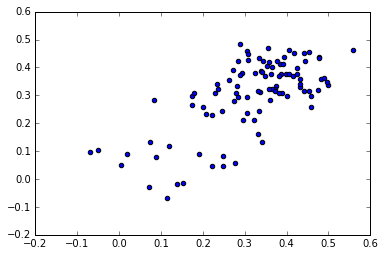

In [42]:
plt.scatter(bfasg['g'],bfascorr[:-1])

In [ ]:
#NOW: Scoring as Factor Analyzed

In [331]:
#### AS Factor Analyzed!
#TO DO: Factor Analyze BFAS SII in R; Output to other notebook; use that to scan for highest loading, etc.

In [43]:
neuro_lbl = ['BFAS.2.',
 'BFAS.4.',
 'BFAS.3.',
 'BFAS.5.',
 'BFAS.6.',
 'BFAS.F7.',
 'BFAS.1.',
 'BFAS.9.',
 'BFAS.15.',
 'BFAS.10.',
 'BFAS.12.',
 'BFAS.8.',
 'BFAS.13.',
 'BFAS.16.',
 'BFAS.17.',
 'BFAS.11.',
 'BFAS.19.',
 'BFAS.18.',
 'BFAS.14.',
 'BFAS.20.']

neurols = [2,4,3,5,6,7,1,9,15,10,12,8,13,16,17,11,19,18,14,20] 

In [44]:
print len(neuro_lbl)
print len(neurols)

20
20


In [45]:
agree_lbl =['BFAS.23.',
 'BFAS.26.',
 'BFAS.24.',
 'BFAS.27.',
 'BFAS.21.',
 'BFAS.22.',
 'BFAS.25.',
 'BFAS.28.',
 'BFAS.29.',
 'BFAS.30.',
 'BFAS.67.',
 'BFAS.63.',
 'BFAS.62.',
 'BFAS.40.',
 'BFAS.66.',
 'BFAS.100.',
 'BFAS.68.',
 'BFAS.70.',
 'BFAS.96.',
 'BFAS.65.',
 'BFAS.97.',
 'BFAS.69.',
 'BFAS.91.']

agree_ls = [23,26,24,27,21,22,25,28,29,30,67,63,62,40,66,100,68,70,96,65,97,69,91] 


In [46]:
print len(agree_lbl)
print len(agree_ls)

23
23


In [47]:
extra_lbl = ['BFAS.71.',
 'BFAS.74.',
 'BFAS.75.',
 'BFAS.78.',
 'BFAS.77.',
 'BFAS.76.',
 'BFAS.73.',
 'BFAS.72.',
 'BFAS.79.',
 'BFAS.61.',
 'BFAS.80.',
 'BFAS.64.',
 'BFAS.37.',
 'BFAS.35.',
 'BFAS.39.',
 'BFAS.38.',
 'BFAS.36.',
 'BFAS.32.',
 'BFAS.34.',
 'BFAS.33.']

extra_ls = [71,74,75,78,77,76,73,72,79,61,80,64,37,35,39,38,36,32,34,33]

In [48]:
print len(extra_lbl)
print len(extra_ls)

20
20


In [49]:
conci_lbl = ['BFAS.52.',
 'BFAS.51.',
 'BFAS.53.',
 'BFAS.56.',
 'BFAS.59.',
 'BFAS.54.',
 'BFAS.42.',
 'BFAS.55.',
 'BFAS.57.',
 'BFAS.58.',
 'BFAS.41.',
 'BFAS.45.',
 'BFAS.46.',
 'BFAS.60.',
 'BFAS.47.',
 'BFAS.43.',
 'BFAS.49.',
 'BFAS.50.',
 'BFAS.31.',
 'BFAS.44.',
 'BFAS.48.']

conci_ls = [52,51,53,56,59,54,42,55,57,58,42,45,46,60,47,43,49,50,31,44,48]

In [50]:
print len(conci_lbl)
print len(conci_ls)

21
21


In [51]:
opn_lbl = ['BFAS.F87.',
 'BFAS.F83.',
 'BFAS.89.',
 'BFAS.81.',
 'BFAS.82.',
 'BFAS.88.',
 'BFAS.90.',
 'BFAS.F84.',
 'BFAS.F85.',
 'BFAS.92.',
 'BFAS.93.',
 'BFAS.F86.',
 'BFAS.98.',
 'BFAS.95.',
 'BFAS.99.',
 'BFAS.94.']

opn_ls = [87,83,89,81,82,88,90,84,85,92,93,86,98,95,99,94]

In [52]:
print len(opn_lbl)
print len(opn_ls)

16
16


In [53]:
bfasfa = bfas.copy(True)

In [343]:
bfas.columns.values.tolist()

[u'BFAS-1+',
 u'BFAS-2+',
 u'BFAS-3+',
 u'BFAS-4+',
 u'BFAS-5+',
 u'BFAS-6+',
 u'BFAS-F7-',
 u'BFAS-8-',
 u'BFAS-9-',
 u'BFAS-10-',
 u'BFAS-11+',
 u'BFAS-12+',
 u'BFAS-13+',
 u'BFAS-14+',
 u'BFAS-15+',
 u'BFAS-16+',
 u'BFAS-17-',
 u'BFAS-18-',
 u'BFAS-19-',
 u'BFAS-20-',
 u'BFAS-21+',
 u'BFAS-22+',
 u'BFAS-23+',
 u'BFAS-24+',
 u'BFAS-25+',
 u'BFAS-26-',
 u'BFAS-27-',
 u'BFAS-28-',
 u'BFAS-29-',
 u'BFAS-30-',
 u'BFAS-31+',
 u'BFAS-32+',
 u'BFAS-33+',
 u'BFAS-34+',
 u'BFAS-35-',
 u'BFAS-36-',
 u'BFAS-37-',
 u'BFAS-38-',
 u'BFAS-39-',
 u'BFAS-40-',
 u'BFAS-41+',
 u'BFAS-42+',
 u'BFAS-43+',
 u'BFAS-44+',
 u'BFAS-45-',
 u'BFAS-46-',
 u'BFAS-47-',
 u'BFAS-48-',
 u'BFAS-49-',
 u'BFAS-50-',
 u'BFAS-51+',
 u'BFAS-52+',
 u'BFAS-53+',
 u'BFAS-54+',
 u'BFAS-55+',
 u'BFAS-56+',
 u'BFAS-57-',
 u'BFAS-58-',
 u'BFAS-59-',
 u'BFAS-60-',
 u'BFAS-61+',
 u'BFAS-62+',
 u'BFAS-63+',
 u'BFAS-64+',
 u'BFAS-65+',
 u'BFAS-66-',
 u'BFAS-67-',
 u'BFAS-68-',
 u'BFAS-69-',
 u'BFAS-70-',
 u'BFAS-71+',
 u'BFAS-72+',


In [55]:
#columns to reverse so that they point towards their named factor
rv_cols = [37,35,39,38,36,32,34,33]


In [56]:
colz = bfasfa.columns.values.tolist()

In [57]:
reverse = [correct_order_bfas[x-1] for x in rv_cols]

In [58]:
for l in reverse:
    bfasfa[l] = 100 - bfasfa[l]

In [348]:
bfas.head()


,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-93+,BFAS-94+,BFAS-95+,BFAS-96+,BFAS-97-,BFAS-98-,BFAS-99-,BFAS-100-,gfp,age
1,39.98,30.29,60.36,55.35,75.39,65.37,39.87,70.16,34.74,24.83,10.02,10.24,10.02,79.96,80.51,90.09,10.02,99.22,35.08,99.33,9.69,0.78,0.67,0.78,10.02,0.33,9.91,0.89,0.89,85.19,0.45,99.89,89.98,59.91,10.24,90.09,30.29,89.87,90.20,0.00,60.36,60.02,34.86,34.41,35.41,20.27,10.24,55.35,35.19,60.58,10.36,0.67,0.67,29.40,0.11,34.52,0.89,0.45,0.78,9.80,0.67,0.56,69.60,44.32,20.04,1.11,0.56,75.28,65.37,25.28,25.50,24.61,60.13,10.24,35.30,19.27,10.13,0.45,70.49,99.00,69.93,69.82,90.20,89.76,54.79,69.49,70.16,75.17,89.87,79.84,99.00,70.04,59.24,10.13,84.86,89.76,0.33,89.87,99.11,20.04,42.520379,60
2,100.00,84.88,95.08,100.00,100.00,45.45,94.90,100.00,100.00,94.63,84.88,95.17,44.90,45.81,85.43,100.00,72.95,82.79,84.70,63.30,56.10,63.57,54.19,54.64,55.37,27.32,54.19,55.74,94.08,82.06,4.74,100.00,94.99,49.64,100.00,27.60,100.00,100.00,100.00,29.96,74.68,79.14,40.98,44.54,19.13,17.30,42.26,66.12,14.94,22.59,54.46,9.93,64.66,50.00,42.81,53.19,17.03,75.41,60.47,40.26,64.75,74.68,54.83,52.91,64.85,14.94,29.87,55.28,4.92,41.80,59.93,85.34,55.74,59.38,5.01,50.00,60.02,45.54,55.56,44.99,83.79,74.95,44.54,69.76,39.89,35.43,65.39,59.56,0.00,40.44,100.00,100.00,72.13,90.07,94.99,100.00,75.14,80.05,94.99,85.52,62.464762,53
3,73.22,67.54,88.47,84.35,8.52,28.01,76.22,85.91,59.74,31.79,50.00,90.26,37.14,90.20,20.77,72.44,52.51,70.10,50.00,44.27,88.47,80.68,96.05,86.92,89.48,89.59,88.36,85.91,90.14,85.24,71.99,77.34,70.21,64.98,89.25,89.81,90.03,89.92,10.75,36.36,95.16,91.48,76.34,9.80,89.81,89.87,61.53,89.14,34.47,57.52,76.78,67.09,64.76,69.21,90.14,67.43,25.00,58.74,40.48,81.79,89.14,25.11,75.78,82.68,69.77,24.89,32.91,39.59,18.76,79.90,79.12,74.89,80.01,71.21,89.48,44.15,48.39,80.23,67.43,34.91,87.47,90.76,64.53,95.71,80.68,83.35,62.08,75.56,88.92,66.65,98.05,95.38,68.32,67.65,98.61,98.83,99.61,89.92,89.59,89.92,69.548746,35
4,76.97,66.51,50.00,46.80,53.92,39.45,34.61,70.46,74.64,43.52,30.76,69.18,33.10,47.35,61.05,73.36,36.28,79.15,35.05,50.00,84.61,72.80,84.16,79.48,73.58,75.53,80.35,86.77,69.29,74.64,45.07,77.81,85.39,75.14,86.22,87.89,87.67,88.78,79.12,64.73,60.22,68.46,59.30,61.89,85.33,70.85,35.77,79.31,65.62,47.13,82.49,78.37,47.30,66.23,66.46,79.93,81.37,71.74,77.75,58.38,44.63,52.87,60.33,52.65,75.22,47.80,50.00,21.85,42.12,34.77,44.07,70.58,45.85,33.60,45.30,60.11,28.09,53.14,42.45,46.35,67.35,69.13,74.75,75.70,76.25,67.35,71.96,67.62,85.66,69.07,86.28,85.05,63.20,83.27,71.58,83.38,83.80,81.65,58.93,75.56,63.934782,33
5,84.08,61.58,53.01,58.80,86.19,76.06,64.81,75.84,82.29,60.47,35.97,47.22,35.41,53.90,46.55,52.56,75.39,76.17,74.39,13.81,82.29,84.08,72.27,83.52,88.08,59.13,61.25,79.62,91.54,90.65,82.18,89.20,89.87,63.47,89.31,52.45,97.55,93.10,92.43,67.04,56.12,53.01,53.67,69.60,43.65,46.99,54.12,73.61,45.66,45.99,81.85,47.33,77.06,83.96,76.73,87.19,34.19,60.13,53.12,64.70,46.10,22.27,58.24,55.79,70.38,53.01,74.94,40.53,53.45,56.68,50.00,22.16,38.53,56.90,55.12,54.23,15.37,46.33,52.67,26.39,54.12,64.81,69.82,44.54,45.43,58.46,54.34,9.69,77.95,50.00,82.18,53.45,78.51,68.93,60.69,45.88,47.33,70.38,73.39,55.90,61.199036,34


In [349]:
bfasfa.head()

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-93+,BFAS-94+,BFAS-95+,BFAS-96+,BFAS-97-,BFAS-98-,BFAS-99-,BFAS-100-,gfp,age
1,39.98,30.29,60.36,55.35,75.39,65.37,39.87,70.16,34.74,24.83,10.02,10.24,10.02,79.96,80.51,90.09,10.02,99.22,35.08,99.33,9.69,0.78,0.67,0.78,10.02,0.33,9.91,0.89,0.89,85.19,0.45,0.11,10.02,40.09,89.76,9.91,69.71,10.13,9.80,0.00,60.36,60.02,34.86,34.41,35.41,20.27,10.24,55.35,35.19,60.58,10.36,0.67,0.67,29.40,0.11,34.52,0.89,0.45,0.78,9.80,0.67,0.56,69.60,44.32,20.04,1.11,0.56,75.28,65.37,25.28,25.50,24.61,60.13,10.24,35.30,19.27,10.13,0.45,70.49,99.00,69.93,69.82,90.20,89.76,54.79,69.49,70.16,75.17,89.87,79.84,99.00,70.04,59.24,10.13,84.86,89.76,0.33,89.87,99.11,20.04,42.520379,60
2,100.00,84.88,95.08,100.00,100.00,45.45,94.90,100.00,100.00,94.63,84.88,95.17,44.90,45.81,85.43,100.00,72.95,82.79,84.70,63.30,56.10,63.57,54.19,54.64,55.37,27.32,54.19,55.74,94.08,82.06,4.74,0.00,5.01,50.36,0.00,72.40,0.00,0.00,0.00,29.96,74.68,79.14,40.98,44.54,19.13,17.30,42.26,66.12,14.94,22.59,54.46,9.93,64.66,50.00,42.81,53.19,17.03,75.41,60.47,40.26,64.75,74.68,54.83,52.91,64.85,14.94,29.87,55.28,4.92,41.80,59.93,85.34,55.74,59.38,5.01,50.00,60.02,45.54,55.56,44.99,83.79,74.95,44.54,69.76,39.89,35.43,65.39,59.56,0.00,40.44,100.00,100.00,72.13,90.07,94.99,100.00,75.14,80.05,94.99,85.52,62.464762,53
3,73.22,67.54,88.47,84.35,8.52,28.01,76.22,85.91,59.74,31.79,50.00,90.26,37.14,90.20,20.77,72.44,52.51,70.10,50.00,44.27,88.47,80.68,96.05,86.92,89.48,89.59,88.36,85.91,90.14,85.24,71.99,22.66,29.79,35.02,10.75,10.19,9.97,10.08,89.25,36.36,95.16,91.48,76.34,9.80,89.81,89.87,61.53,89.14,34.47,57.52,76.78,67.09,64.76,69.21,90.14,67.43,25.00,58.74,40.48,81.79,89.14,25.11,75.78,82.68,69.77,24.89,32.91,39.59,18.76,79.90,79.12,74.89,80.01,71.21,89.48,44.15,48.39,80.23,67.43,34.91,87.47,90.76,64.53,95.71,80.68,83.35,62.08,75.56,88.92,66.65,98.05,95.38,68.32,67.65,98.61,98.83,99.61,89.92,89.59,89.92,69.548746,35
4,76.97,66.51,50.00,46.80,53.92,39.45,34.61,70.46,74.64,43.52,30.76,69.18,33.10,47.35,61.05,73.36,36.28,79.15,35.05,50.00,84.61,72.80,84.16,79.48,73.58,75.53,80.35,86.77,69.29,74.64,45.07,22.19,14.61,24.86,13.78,12.11,12.33,11.22,20.88,64.73,60.22,68.46,59.30,61.89,85.33,70.85,35.77,79.31,65.62,47.13,82.49,78.37,47.30,66.23,66.46,79.93,81.37,71.74,77.75,58.38,44.63,52.87,60.33,52.65,75.22,47.80,50.00,21.85,42.12,34.77,44.07,70.58,45.85,33.60,45.30,60.11,28.09,53.14,42.45,46.35,67.35,69.13,74.75,75.70,76.25,67.35,71.96,67.62,85.66,69.07,86.28,85.05,63.20,83.27,71.58,83.38,83.80,81.65,58.93,75.56,63.934782,33
5,84.08,61.58,53.01,58.80,86.19,76.06,64.81,75.84,82.29,60.47,35.97,47.22,35.41,53.90,46.55,52.56,75.39,76.17,74.39,13.81,82.29,84.08,72.27,83.52,88.08,59.13,61.25,79.62,91.54,90.65,82.18,10.80,10.13,36.53,10.69,47.55,2.45,6.90,7.57,67.04,56.12,53.01,53.67,69.60,43.65,46.99,54.12,73.61,45.66,45.99,81.85,47.33,77.06,83.96,76.73,87.19,34.19,60.13,53.12,64.70,46.10,22.27,58.24,55.79,70.38,53.01,74.94,40.53,53.45,56.68,50.00,22.16,38.53,56.90,55.12,54.23,15.37,46.33,52.67,26.39,54.12,64.81,69.82,44.54,45.43,58.46,54.34,9.69,77.95,50.00,82.18,53.45,78.51,68.93,60.69,45.88,47.33,70.38,73.39,55.90,61.199036,34


In [62]:
bfasfa = bfasfa.drop(['gfp'],axis=1)

In [64]:
bfasfa.to_csv("BFAS_STUDY_II_as_FA.csv",index=False)

In [63]:
bfasfa.head()

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-93+,BFAS-94+,BFAS-95+,BFAS-96+,BFAS-97-,BFAS-98-,BFAS-99-,BFAS-100-
0,39.98,30.29,60.36,55.35,75.39,65.37,39.87,70.16,34.74,24.83,10.02,10.24,10.02,79.96,80.51,90.09,10.02,99.22,35.08,99.33,9.69,0.78,0.67,0.78,10.02,0.33,9.91,0.89,0.89,85.19,0.45,0.11,10.02,40.09,89.76,9.91,69.71,10.13,9.80,0.00,60.36,60.02,34.86,34.41,35.41,20.27,10.24,55.35,35.19,60.58,10.36,0.67,0.67,29.40,0.11,34.52,0.89,0.45,0.78,9.80,0.67,0.56,69.60,44.32,20.04,1.11,0.56,75.28,65.37,25.28,25.50,24.61,60.13,10.24,35.30,19.27,10.13,0.45,70.49,99.00,69.93,69.82,90.20,89.76,54.79,69.49,70.16,75.17,89.87,79.84,99.00,70.04,59.24,10.13,84.86,89.76,0.33,89.87,99.11,20.04
1,100.00,84.88,95.08,100.00,100.00,45.45,94.90,100.00,100.00,94.63,84.88,95.17,44.90,45.81,85.43,100.00,72.95,82.79,84.70,63.30,56.10,63.57,54.19,54.64,55.37,27.32,54.19,55.74,94.08,82.06,4.74,0.00,5.01,50.36,0.00,72.40,0.00,0.00,0.00,29.96,74.68,79.14,40.98,44.54,19.13,17.30,42.26,66.12,14.94,22.59,54.46,9.93,64.66,50.00,42.81,53.19,17.03,75.41,60.47,40.26,64.75,74.68,54.83,52.91,64.85,14.94,29.87,55.28,4.92,41.80,59.93,85.34,55.74,59.38,5.01,50.00,60.02,45.54,55.56,44.99,83.79,74.95,44.54,69.76,39.89,35.43,65.39,59.56,0.00,40.44,100.00,100.00,72.13,90.07,94.99,100.00,75.14,80.05,94.99,85.52
2,73.22,67.54,88.47,84.35,8.52,28.01,76.22,85.91,59.74,31.79,50.00,90.26,37.14,90.20,20.77,72.44,52.51,70.10,50.00,44.27,88.47,80.68,96.05,86.92,89.48,89.59,88.36,85.91,90.14,85.24,71.99,22.66,29.79,35.02,10.75,10.19,9.97,10.08,89.25,36.36,95.16,91.48,76.34,9.80,89.81,89.87,61.53,89.14,34.47,57.52,76.78,67.09,64.76,69.21,90.14,67.43,25.00,58.74,40.48,81.79,89.14,25.11,75.78,82.68,69.77,24.89,32.91,39.59,18.76,79.90,79.12,74.89,80.01,71.21,89.48,44.15,48.39,80.23,67.43,34.91,87.47,90.76,64.53,95.71,80.68,83.35,62.08,75.56,88.92,66.65,98.05,95.38,68.32,67.65,98.61,98.83,99.61,89.92,89.59,89.92
3,76.97,66.51,50.00,46.80,53.92,39.45,34.61,70.46,74.64,43.52,30.76,69.18,33.10,47.35,61.05,73.36,36.28,79.15,35.05,50.00,84.61,72.80,84.16,79.48,73.58,75.53,80.35,86.77,69.29,74.64,45.07,22.19,14.61,24.86,13.78,12.11,12.33,11.22,20.88,64.73,60.22,68.46,59.30,61.89,85.33,70.85,35.77,79.31,65.62,47.13,82.49,78.37,47.30,66.23,66.46,79.93,81.37,71.74,77.75,58.38,44.63,52.87,60.33,52.65,75.22,47.80,50.00,21.85,42.12,34.77,44.07,70.58,45.85,33.60,45.30,60.11,28.09,53.14,42.45,46.35,67.35,69.13,74.75,75.70,76.25,67.35,71.96,67.62,85.66,69.07,86.28,85.05,63.20,83.27,71.58,83.38,83.80,81.65,58.93,75.56
4,84.08,61.58,53.01,58.80,86.19,76.06,64.81,75.84,82.29,60.47,35.97,47.22,35.41,53.90,46.55,52.56,75.39,76.17,74.39,13.81,82.29,84.08,72.27,83.52,88.08,59.13,61.25,79.62,91.54,90.65,82.18,10.80,10.13,36.53,10.69,47.55,2.45,6.90,7.57,67.04,56.12,53.01,53.67,69.60,43.65,46.99,54.12,73.61,45.66,45.99,81.85,47.33,77.06,83.96,76.73,87.19,34.19,60.13,53.12,64.70,46.10,22.27,58.24,55.79,70.38,53.01,74.94,40.53,53.45,56.68,50.00,22.16,38.53,56.90,55.12,54.23,15.37,46.33,52.67,26.39,54.12,64.81,69.82,44.54,45.43,58.46,54.34,9.69,77.95,50.00,82.18,53.45,78.51,68.93,60.69,45.88,47.33,70.38,73.39,55.90


In [65]:
bg2 = pd.read_csv("./bfas_II_OMEGA_5_AS_FACTOR_ANALYZED.csv")

In [66]:
bg2.head()

,Unnamed: 0,g,F1*,F2*,F3*,F4*,F5*,h2,u2,p2
0,BFAS.1.,0.386703,0.622390,0.218681,-0.214106,-0.062299,0.030659,0.654222,0.345778,0.228575
1,BFAS.2.,0.425251,0.726317,-0.002605,-0.047244,-0.063046,0.064393,0.715798,0.284202,0.252639
2,BFAS.3.,0.431963,0.668023,0.020220,-0.105405,0.101608,-0.007119,0.657384,0.342616,0.283841
3,BFAS.4.,0.432831,0.678741,0.008735,-0.065115,0.067936,-0.000190,0.658442,0.341558,0.284524
4,BFAS.5.,0.444673,0.657038,0.133455,-0.083612,-0.031479,0.059815,0.664607,0.335393,0.297521


In [68]:
bfasfa['opg'] = ssopg['opg']

In [69]:
bfcorr2 = bfasfa.corr()

In [77]:
ssp.pearsonr(bfcorr2['opg'].values[0:-1],bg2['g'].values)

(0.84330730423683053, 3.5413180001863023e-28)